# Neural_Network_Image_Classification Convolutional Neural Network

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import keras
import matplotlib.pyplot as plt
import pickle
import sys
import numpy as np
import tensorflow as tf
from keras import optimizers
import os
from tensorflow import keras
from tensorflow.keras import layers
from mlxtend.plotting import plot_confusion_matrix
import random
from PIL import Image
from contextlib import redirect_stdout
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
image_width, image_height = 200, 200
epochs = 3
batch_size = 15
test_size = 30
number_of_classes = 20
input_shape = (image_width, image_height, 3)
file_path_train = r"/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/small_split_images_folders/train/"
file_path_validation = r"/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/small_split_images_folders/val/"
file_path_test = r"/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/small_split_images_folders/test/"

In [27]:
# # def make_model():
# #   model = tf.keras.Sequential()

# #   model.add(tf.keras.layers.Conv2D(32, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
# #   model.add(tf.keras.layers.Conv2D(32, 3, 3, padding='same', activation='relu'))
# #   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# #   model.add(tf.keras.layers.Conv2D(64, 3, 3, padding='same', activation='relu'))
# #   model.add(tf.keras.layers.Conv2D(64, 3, 3, padding='same', activation='relu'))
# #   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# #   # model.add(tf.keras.layers.Conv2D(128, 3, 3, padding='same', activation='relu'))
# #   # model.add(tf.keras.layers.Conv2D(128, 3, 3, padding='same', activation='relu'))
# #   # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# #   # model.add(tf.keras.layers.Conv2D(256, 3, 3, padding='same', activation='relu'))
# #   # model.add(tf.keras.layers.Conv2D(256, 3, 3, padding='same', activation='relu'))
# #   # model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

# #   model.add(tf.keras.layers.Flatten())
# #   model.add(tf.keras.layers.Dense(64, activation='relu'))
# #   model.add(tf.keras.layers.Dropout(0.5))

# #   model.add(tf.keras.layers.Dense(64, activation='relu'))
# #   model.add(tf.keras.layers.Dropout(0.5))

# #   model.add(tf.keras.layers.Dense(1))
# #   model.add(tf.keras.layers.Activation('sigmoid'))

# #   return model
# model = Sequential()

# # model.add(Conv2D(16, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
# # model.add(Conv2D(16, 3, 3, padding='same', activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, 3, 3, padding='same', input_shape=input_shape, activation='relu'))
# model.add(Conv2D(32, 3, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
# model.add(Conv2D(64, 3, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
# model.add(Conv2D(128, 3, 3, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# # model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
# # model.add(Conv2D(256, 3, 3, padding='same', activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(128, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(number_of_classes)
])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

model.compile(loss='binary_crossentropy',
            optimizer=RMSprop(lr=0.0001),
            metrics=['accuracy'])

In [28]:
# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# if tpu:
#   tf.tpu.experimental.initialize_tpu_system(tpu)
#   strategy = tf.distribute.experimental.TPUStrategy(tpu)
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])  
# else:
#   strategy = tf.distribute.get_strategy()
#   print('Running on CPU instead')
# print("Number of accelerators: ", strategy.num_replicas_in_sync)

# tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [29]:
model_summary = model.summary()
with open('model_summary.png', 'w') as f:
    with redirect_stdout(f):
        model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               20480128  
_________________________________________________________________
dense_5 (Dense)              (None, 20)                2580      
Total params: 20,483,156
Trainable params: 20,483,156
Non-trainable params: 0
__________________________________________

In [30]:
scale = 1./255
training_data_image_classification = ImageDataGenerator(rescale= scale, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
validation_data_image_classification = ImageDataGenerator(rescale= scale)
test_data_image_classification = ImageDataGenerator(rescale= scale)

In [31]:
# training_generator=tf.keras.preprocessing.image_dataset_from_directory(file_path_train,
#     image_size=(image_width, image_height),
#     batch_size=batch_size,subset='training',validation_split=0.2, seed=123)

training_generator = training_data_image_classification.flow_from_directory(file_path_train,
    target_size=(image_width, image_height),
    batch_size=batch_size, class_mode='categorical')

Found 1355 images belonging to 20 classes.


In [32]:
# validation_generator=tf.keras.preprocessing.image_dataset_from_directory(file_path_train,
#     image_size=(image_width, image_height),
#     batch_size=batch_size,subset='validation',validation_split=0.2, seed=123)

validation_generator = validation_data_image_classification.flow_from_directory(file_path_validation,
    target_size=(image_width, image_height),
    batch_size=32, class_mode='categorical')

Found 160 images belonging to 20 classes.


In [33]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [34]:
test_generator = test_data_image_classification.flow_from_directory(file_path_test,
    target_size=(image_width, image_height),
    batch_size=32, class_mode='categorical')

Found 188 images belonging to 20 classes.


In [35]:
for data_batch, labels_batch in training_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 200, 200, 3)
labels batch shape: (15, 20)


In [36]:
class_names = training_generator.class_indices
print(class_names)

{'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}


In [37]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE

# training_generator = training_generator.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# validation_generator = validation_generator.cache().prefetch(buffer_size=AUTOTUNE)


In [38]:
# normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [39]:
# normalized_ds = training_generator.map(lambda x, y: (normalization_layer(x), y))
# data_batch, labels_batch = next(iter(normalized_ds))
# first_image = data_batch[0]
# print(np.min(first_image), np.max(first_image))

In [40]:
# early = keras.callbacks.EarlyStopping(monitor='val_acc', patience=4, verbose=1 )

In [59]:
# trained_model = model.fit(
#   training_generator,
#   validation_data=validation_generator,
#   epochs=epochs
# )

trained_model = model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames)/training_generator.batch_size,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames)/validation_generator.batch_size)

Epoch 1/3
91/90 [==============================] - 180s 2s/step - loss: 0.2609 - accuracy: 0.4074 - val_loss: 0.2956 - val_accuracy: 0.4250
Epoch 2/3
91/90 [==============================] - 221s 2s/step - loss: 0.2615 - accuracy: 0.4066 - val_loss: 0.2869 - val_accuracy: 0.4250
Epoch 3/3
91/90 [==============================] - 221s 2s/step - loss: 0.2608 - accuracy: 0.4066 - val_loss: 0.3237 - val_accuracy: 0.4250


In [60]:
model.save_weights("small_CNN_for_image_detection_small.h5")

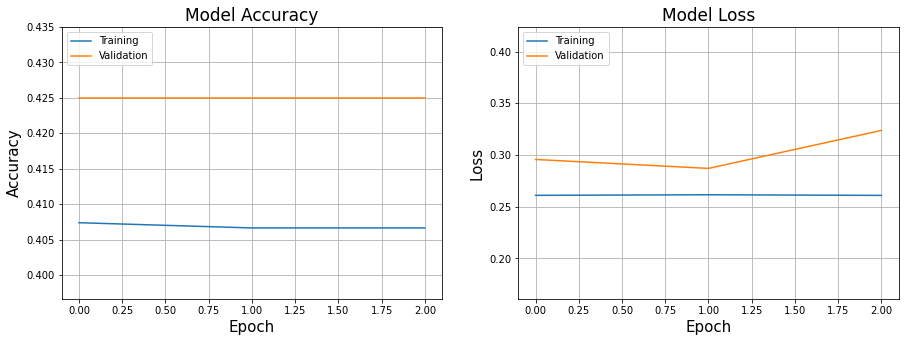

In [61]:
xlabel = 'Epoch'
legends = ['Training', 'Validation']
ylim_pad = [0.01, 0.1]
plt.figure(figsize=(15, 5))
y1 = trained_model.history['accuracy']
y2 = trained_model.history['val_accuracy']

min_y = min(min(y1), min(y2))-ylim_pad[0]
max_y = max(max(y1), max(y2))+ylim_pad[0]


plt.subplot(121)
plt.plot(y1)
plt.plot(y2)
plt.title('Model Accuracy', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
    
y1 = trained_model.history['loss']
y2 = trained_model.history['val_loss']
min_y = min(min(y1), min(y2))-ylim_pad[1]
max_y = max(max(y1), max(y2))+ylim_pad[1]
    
plt.subplot(122)
plt.plot(y1)
plt.plot(y2)

plt.title('Model Loss', fontsize=17)
plt.xlabel(xlabel, fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.ylim(min_y, max_y)
plt.legend(legends, loc='upper left')
plt.grid()
plt.savefig('/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/model_lost_and_accuracy2.png', dpi =500)                      
plt.show()

In [64]:
print("results")
result  = model.evaluate(test_generator, steps=len(test_generator), verbose=2)

print("%s%.2f  "% ("Loss     : ", result[0]))
print("%s%.2f%s"% ("Accuracy : ", result[1]*100, "%"))

results
6/6 - 2s - loss: 0.3548 - accuracy: 0.3723
Loss     : 0.35  
Accuracy : 37.23%


In [65]:
y_pred = model.predict_generator(test_generator, steps=len(test_generator), verbose=1)  
y_pred = y_pred.argmax(axis=-1)
y_true=validation_generator.class_indices
print(y_pred.shape)
print(y_true)

6/6 [==============================] - 2s 314ms/step
(188,)
{'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}


In [66]:
image_file_name = "/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/models_image_files/"

file_path = 'CNN_for_image_detection_small.h5'
title = file_path.split("/")
model_title = "/".join([i for i in title[3:]])

precision = precision_score(y_true, y_pred, average="weighted") 
recall = recall_score(y_true, y_pred, average="weighted") 
f1 = f1_score(y_true, y_pred, average="weighted") 

print("-"*90)
print("Derived Report")
print("-"*90)
print("%s%.2f%s"% ("Precision     : ", precision*100, "%"))
print("%s%.2f%s"% ("Recall        : ", recall*100,    "%"))
print("%s%.2f%s"% ("F1-Score      : ", f1*100,        "%"))
print("-"*90)
print("\n\n")

CM = confusion_matrix(y_true*10, y_pred*10)
fig, ax = plot_confusion_matrix(conf_mat=CM , figsize=(10,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(len(classes)), classes, fontsize=10)
plt.yticks(range(len(classes)), classes, fontsize=10)
plt.title("Confusion Matrix for Model File (Test Dataset): \n"+model_title, fontsize=10)
fig.savefig(image_file_name+'labelvstruelabel.png', dpi=500)
plt.show()
    

cls_report_print = classification_report(y_true, y_pred, target_names=classes)

cls_report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

print("\n\n")
print("-"*90)
print("Report for Model File: ", model_title)
print("-"*90)
print(cls_report_print)
print("-"*90)

ValueError: Found input variables with inconsistent numbers of samples: [20, 188]

In [51]:
numofbatch = len(test_generator)

batch_no = random.randint(0, numofbatch-1)

y_img_batch, y_true_batch = test_generator[batch_no] 
y_true_batch = y_true_batch.argmax(axis=-1)

y_pred_batch = model.predict(y_img_batch)
y_pred_batch = y_pred_batch.argmax(axis=-1)


sizeofbatch = (y_true_batch)
print("-"*35)
print("%s%d"%     ("Selected Batch No       : ", batch_no))
print("-"*35)
#print("%s%d"%     ("Batch Size              : ", (y_pred_batch)))
#print("-"*35)
print("%s%.2f%s"% ("Accuracy                : ", np.mean(y_true==y_pred)*100, "%"))
print("-"*35)

-----------------------------------
Selected Batch No       : 2
-----------------------------------
Accuracy                : 0.00%
-----------------------------------


In [26]:
def show_predictions(test_generator, y_true, y_pred, subplot_params, plot_params, class_map, testing_dir, image_file_name, count=8, sample=True):
    fig, axs = get_fig_axs(subplot_params)
    plt.rcParams.update({'axes.titlesize': plot_params["axes.titlesize"]})
    plt.subplots_adjust(hspace=subplot_params["hspace"], wspace=subplot_params["wspace"])
    image_file_name = "/home/ronaldsonbellande/Desktop/Machine Learning/Machine_Learning/Project & Research/models_image_files/"
    file_names = test_generator.filenames
    
    m = {}
    length = len(y_true)

    for i in range(0, count): 
        num = i
        if sample:
            num = random.randint(0, length-1)
            while num in m:
                num = int(random.randint(0, length-1))

            m[num]=1


        plt.subplot(subplot_params["nrows"], subplot_params["ncols"], i+1)
        img = plt.imread(file_path_test+"//"+ file_names[num])
        plt.imshow(img, aspect='auto')

        plt.xticks([])
        plt.yticks([])
        
        
        original = class_map[y_true[num]]
        predicted = class_map[y_pred[num]]
        
        
        title_text = ("%s%s%s%s%s"%("True: ", original, "\n", "Pred: ", predicted))
        
        if original==predicted:
            plt.title(title_text)
        else:
            plt.title(title_text, color='red')  

        fig.savefig(image_file_name, dpi=subplot_params["dpi"])
    
    plt.tight_layout()
    plt.savefig('small_prediction.png',dpi=500)
    plt.show()

In [27]:
def get_fig_axs(subplot_params):
    fig, axs = plt.subplots(
        nrows=subplot_params["nrows"], ncols=subplot_params["ncols"], 
        figsize=(subplot_params["figsize_col"], subplot_params["figsize_row"]),
        dpi=subplot_params["dpi"], facecolor=subplot_params["facecolor"], 
        edgecolor=subplot_params["edgecolor"], subplot_kw=subplot_params["subplot_kw"])
        
    return fig, axs

In [28]:
def subplot(nrows, ncols, dpi):
    subplot_params = {}
    subplot_params["nrows"] = nrows
    subplot_params["ncols"] = ncols

    subplot_params["figsize_col"] = subplot_params["ncols"]*2.5
    subplot_params["figsize_row"] = subplot_params["nrows"]*2.5
    subplot_params["dpi"] = dpi
    subplot_params["facecolor"] = 'w'
    subplot_params["edgecolor"] = 'k'
    subplot_params["subplot_kw"] = {'xticks': [], 'yticks': []}
    subplot_params["axes.titlesize"] = 'small'
    subplot_params["hspace"] = 0.5
    subplot_params["wspace"] = 0.3
    
    return subplot_params

In [29]:
def reset_plot_params(figsize=(15, 5), title="", xlabel ="", ylabel="", legends=[], title_fontsize = 18, label_fontsize = 14, image_file_name="", save = False, dpi=100, update_image=True):
    plot_params = {}
    
    plot_params["figsize"] = figsize
    
    plot_params["title"] = title
    
    plot_params["xlabel"] = xlabel
    plot_params["ylabel"] = ylabel
    
    plot_params["legends"] = legends 
    
    plot_params["title_fontsize"] = title_fontsize
    plot_params["axes.titlesize"] = "small"
    plot_params["label_fontsize"] = label_fontsize
    
    plot_params["image_file_name"] = image_file_name
    plot_params["save"] = save
    plot_params["update_image"] = update_image
    
    plot_params["subplot"] = None
    return plot_params

In [30]:
image_file_name_batch = "/result"
image_file_name_sample = "/sample"

batch_size_t = (y_true_batch)

class_map = {v: k for k, v in test_generator.class_indices.items()}

dpi=100

ncols = 8
nrows = 4

count = ncols*nrows

subplot_params = subplot(nrows, ncols, dpi)
plot_params = reset_plot_params()

NameError: name 'y_true_batch' is not defined

In [31]:
show_predictions(test_generator, y_true, y_pred, subplot_params, plot_params, class_map, file_path_test, image_file_name_batch, count=count, sample=True)

NameError: name 'test_generator' is not defined